In [935]:
import pandas as pd

# Read each separate table

In [936]:
df_critics = pd.read_csv('critics-psql.csv', index_col='id')
df_films = pd.read_csv('films-psql.csv', index_col='id')
df_reviews = pd.read_csv('reviews-psql.csv', index_col='id')
df_directors = pd.read_csv('directors-psql.csv', index_col='id')
df_directions = pd.read_csv('directions-psql.csv', index_col='id')
df_countries = pd.read_csv('countries-psql.csv', index_col='id', keep_default_na=False)
df_continents = pd.read_csv('continents-psql.csv', index_col='id', keep_default_na=False)
df_genres = pd.read_csv('genres-psql.csv', index_col='id')

In [937]:
# Top 3 of the films appearing the most frequently on the top tens
df_reviews['film_id'].value_counts().head(3)

1     49
0     47
33    35
Name: film_id, dtype: int64

In [938]:
# Same list but with the films title
# with films title
(df_reviews.merge(
    df_films, 
    left_on='film_id', 
    right_index=True)
 ['title'].value_counts()
 .head(3))

In the Mood for Love    49
Mulholland Drive        47
There Will Be Blood     35
Name: title, dtype: int64

In [939]:
# How many times does Terrence Malick appear is the top tens and for which film
df[df['director_id'] == 2]['film_id'].value_counts()

2      23
124     8
548     1
Name: film_id, dtype: int64

In [940]:
# Merge most of the dataframes
df = (df_reviews
      .merge(df_critics, left_on='critic_id', right_index=True)
      .merge(df_films, left_on='film_id', right_index=True)
      .merge(df_directions, left_on='film_id', right_on='film_id')
      .merge(df_directors, left_on='director_id', right_index=True)
      )

df.rename(columns={
    'full_name_x':'critic_name', 
    'full_name_y':'director_name',
    'nationality_code_x':'critic_country_code',
    'nationality_code_y':'director_country_code',
    'year_of_birth':'director_year_of_birth',
    'company': 'critic_company',
    'title': 'film_title'},
          inplace=True)

df.merge(df_countries, left_on='director_country_code', right_on='code')


,critic_id,film_id,rank,critic_name,critic_country_code,critic_company,film_title,release_year,rating,duration,director_id,director_name,director_year_of_birth,director_country_code,name,code,continent_code
0,0,0,0,Simon Abrams,US,Freelance film critic,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
1,3,0,1,Arturo Aguilar,MX,Rolling Stone Mexico,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
2,4,0,5,Matthew Anderson,GB,BBC Culture,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
3,7,0,1,Michael Arbeiter,US,Nerdist,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
4,8,0,3,Ali Arikan,TR,Dipnot TV,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
5,9,0,7,Michael Atkinson,US,The Village Voice,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
6,10,0,1,Ana Maria Bahiana,BR,Freelance film critic,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
7,15,0,6,Diego Batlle,AR,La Nacion,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
8,16,0,0,NT Binh,FR,Positif,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
9,24,0,0,Luke Buckmaster,AU,The Guardian/BBC Culture,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA


In [941]:
df.head()

,critic_id,film_id,rank,critic_name,critic_country_code,critic_company,film_title,release_year,rating,duration,director_id,director_name,director_year_of_birth,director_country_code
0,0,0,0,Simon Abrams,US,Freelance film critic,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US
1,3,0,1,Arturo Aguilar,MX,Rolling Stone Mexico,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US
2,4,0,5,Matthew Anderson,GB,BBC Culture,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US
3,7,0,1,Michael Arbeiter,US,Nerdist,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US
4,8,0,3,Ali Arikan,TR,Dipnot TV,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US


In [942]:
df[df['critic_name'] == 'Ali Arikan'].head()

,critic_id,film_id,rank,critic_name,critic_country_code,critic_company,film_title,release_year,rating,duration,director_id,director_name,director_year_of_birth,director_country_code
4,8,0,3,Ali Arikan,TR,Dipnot TV,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US
50,8,1,9,Ali Arikan,TR,Dipnot TV,In the Mood for Love,2000,8.1,98.0,1,Kar-Wai Wong,1956.0,CN
691,8,67,0,Ali Arikan,TR,Dipnot TV,The Master,2012,7.1,144.0,34,Paul Thomas Anderson,1970.0,US
736,8,72,6,Ali Arikan,TR,Dipnot TV,A Serious Man,2009,7.0,106.0,41,Ethan Coen,1957.0,US
737,8,72,6,Ali Arikan,TR,Dipnot TV,A Serious Man,2009,7.0,106.0,42,Joel Coen,1954.0,US


In [943]:
# How many times does David Lynch appear is the top ten and for which film
df[df['director_name'] == 'David Lynch']['film_title'].value_counts()

Mulholland Drive    47
Inland Empire        1
Name: film_title, dtype: int64

In [944]:
# How many times does Terrence Malick appear is the top ten and for which film
df[df['director_name'] == 'Terrence Malick']['film_title'].value_counts()

The Tree of Life    23
The New World        8
Knight of Cups       1
Name: film_title, dtype: int64

In [945]:
df.groupby('director_name')['film_title'].value_counts()

director_name                film_title                                 
(2012)                       It's Such a Beautiful Day                       3
Abbas Kiarostami             Certified Copy                                  9
                             Ten                                             4
                             Like Someone In Love                            2
Abdellatif Kechiche          Blue Is the Warmest Color                       7
Abderrahmane Sissako         Timbuktu                                        9
                             Waiting for Happiness                           2
Adam Curtis                  The Century of the Self                         1
Adam McKay                   Anchorman: The Legend of Ron Burgundy           1
                             Step Brothers                                   1
                             Talladega Nights: The Ballad of Ricky Bobby     1
Agnieszka Holland            Burning Bush                 

In [946]:
# Who are the directors of the films directed by more than 2 people
(df.groupby('film_title')
 .apply(lambda x: x['director_name'])
 .groupby(level=0)
 .filter(lambda x: len(x.unique()) > 2)
 .groupby(level=0)
 .apply(lambda x: x.unique()))

film_title
7 Letters                             [Junfeng Boo, Eric Khoo, Jack Neo, K Rajagopal...
Leviathan                             [Andrey Zvyagintsev, Lucien Castaing-Taylor, V...
Madagascar 3: Europe's Most Wanted           [Eric Darnell, Tom McGrath, Conrad Vernon]
Monsters, Inc.                              [Lee Unkrich, Pete Docter, David Silverman]
The Act of Killing                      [Joshua Oppenheimer, Anonymous, Christine Cynn]
Name: director_name, dtype: object

In [947]:
# Who are the directors who work in couple
(df.groupby('film_title')
 .apply(lambda x: x['director_name'])
 .groupby(level=0)
 .filter(lambda x: len(x.unique()) == 2)
 .groupby(level=0)
 .apply(lambda x: x.unique()))

film_title
5 Broken Cameras                                                             [Emad Burnat, Guy Davidi]
A Serious Man                                                                  [Ethan Coen, Joel Coen]
Ajami                                                                     [Scandar Copti, Yaron Shani]
American Splendor                                              [Shari Springer Berman, Robert Pulcini]
Anomalisa                                                              [Charlie Kaufman, Duke Johnson]
Captain America: Winter Soldier                                             [Anthony Russo, Joe Russo]
City of God                                                           [Fernando Meirelles, Kátia Lund]
Closed Curtain                                                        [Jafar Panahi, Kambuzia Partovi]
Crank                                                                   [Mark Neveldine, Brian Taylor]
Finding Nemo                                                  

In [948]:
# The films that have the most of 1st rank
df[df['rank'] == 0]['film_title'].value_counts().head(10)

Mulholland Drive          16
In the Mood for Love      13
No Country For Old Men     8
Inside Llewyn Davis        8
The Tree of Life           7
Yi Yi: A One and a Two     7
Boyhood                    6
There Will Be Blood        6
Werckmeister Harmonies     6
Synecdoche, New York       4
Name: film_title, dtype: int64

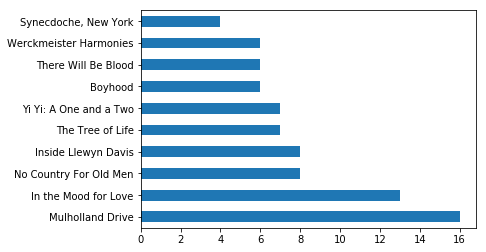

In [949]:
%matplotlib inline
df[df['rank'] == 0]['film_title'].value_counts().head(10).plot(kind='barh')

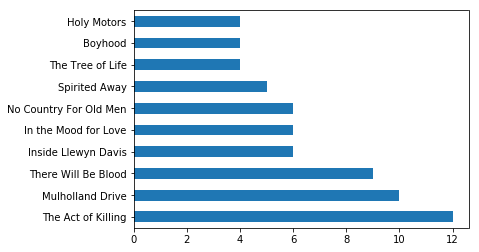

In [950]:
df[df['rank'] == 1]['film_title'].value_counts().head(10).plot(kind='barh')

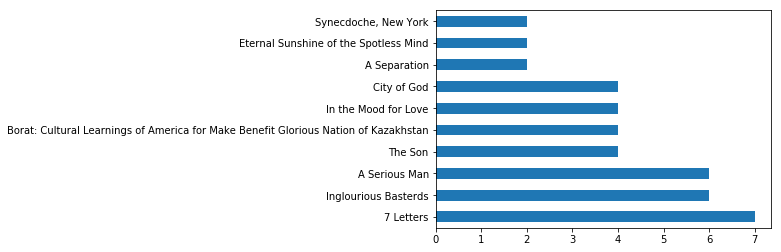

In [951]:
df[df['rank'] == 9]['film_title'].value_counts().head(10).plot(kind='barh')

In [952]:
# # Films directed by brothers
# def get_browsers(row):
#     # Get the list of directors, get rid of the duplications
#     directors = row['director_id'].unique()
#     # Take the movie only if two people directed it
#     if len(directors) == 2:
#         # If these two people have the same last name, print them
#         if df_directors.iloc[directors[0]]['last_name'] == df_directors.iloc[directors[1]]['last_name']:
#             return (df_directors.iloc[directors[0]]['first_name'] + " " + df_directors.iloc[directors[0]]['last_name']
#                     + ", " + df_directors.iloc[directors[1]]['first_name'] + " " + df_directors.iloc[directors[1]]['last_name'])

# df.groupby('title').apply(get_browsers).dropna()


In [953]:
df_directors[df_directors['nationality_code'].isnull()].head()

,full_name,year_of_birth,nationality_code
id,,,
14,Anonymous,NaN,NaN
15,Christine Cynn,NaN,NaN
60,Michael Pitiot,1970.0,NaN
65,Rick Alverson,NaN,NaN
85,Guy Bolongaro,NaN,NaN


In [954]:
df_directors = df_directors.merge(df_countries, left_on='nationality_code', right_on='code')
#df_directors.drop(['code', 'nationality_code'], axis=1, inplace=True)

In [955]:
df_directors.head()

,full_name,year_of_birth,nationality_code,name,code,continent_code
0,Kar-Wai Wong,1956.0,CN,"China, People's Republic of",CN,AS
1,Edward Yang,1947.0,CN,"China, People's Republic of",CN,AS
2,Zhangke Jia,1970.0,CN,"China, People's Republic of",CN,AS
3,Yimou Zhang,1951.0,CN,"China, People's Republic of",CN,AS
4,Hsiao-Hsien Hou,1947.0,CN,"China, People's Republic of",CN,AS


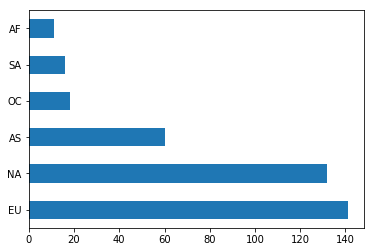

In [956]:
df_directors['continent_code'].value_counts().plot(kind='barh')

In [957]:
df_films.head()

,title,release_year,rating,duration
id,,,,
0,Mulholland Drive,2001,8.0,147.0
1,In the Mood for Love,2000,8.1,98.0
2,The Tree of Life,2011,6.8,139.0
3,Yi Yi: A One and a Two,2000,8.1,173.0
4,Goodbye to Language,2014,5.9,70.0


In [958]:
df_directors.head()

,full_name,year_of_birth,nationality_code,name,code,continent_code
0,Kar-Wai Wong,1956.0,CN,"China, People's Republic of",CN,AS
1,Edward Yang,1947.0,CN,"China, People's Republic of",CN,AS
2,Zhangke Jia,1970.0,CN,"China, People's Republic of",CN,AS
3,Yimou Zhang,1951.0,CN,"China, People's Republic of",CN,AS
4,Hsiao-Hsien Hou,1947.0,CN,"China, People's Republic of",CN,AS


In [959]:
df_directors.groupby(['name', 'code'])['full_name'].value_counts()

name                         code  full_name            
Argentina                    AR    Damián Szifron           1
                                   Fabián Bielinsky         1
                                   Gaspar Noé               1
                                   Juan José Campanella     1
                                   Lucrecia Martel          1
                                   Mariano Llinás           1
Ashmore and Cartier Islands  AU    Baz Luhrmann             1
                                   George Miller            1
                                   Peter Weir               1
                                   Wayne Blair              1
Australia                    AU    Baz Luhrmann             1
                                   George Miller            1
                                   Peter Weir               1
                                   Wayne Blair              1
Austria                      AT    Jessica Hausner          1
             

In [960]:
df_genres[df_genres['genre'] == 'Animation'].merge(df_films, left_on='film_id', right_index=True).head()

,film_id,genre,title,release_year,rating,duration
id,,,,,,
23,12,Animation,Spirited Away,2001,8.6,125.0
94,43,Animation,Finding Nemo,2003,8.1,100.0
148,66,Animation,The Congress,2013,6.5,122.0
195,84,Animation,The Incredibles,2004,8.0,115.0
230,100,Animation,Toy Story 3,2010,8.3,103.0


In [961]:
# All the genres of the films quoted by critic #0
df_genres[df_genres['film_id'].isin(df[df['critic_id'] == 0]['film_id'])]

,film_id,genre
id,,
0,0,Drama
2,1,Drama
3,1,Romance
4,2,Drama
5,2,Fantasy
6,3,Drama
7,3,Romance
8,4,Drama
9,4,Fantasy


In [962]:
tp = (df_genres[df_genres['film_id'].isin(df[df['critic_id'] == 0]['film_id'])]
 .reset_index())

In [963]:
tp

,id,film_id,genre
0,0,0,Drama
1,2,1,Drama
2,3,1,Romance
3,4,2,Drama
4,5,2,Fantasy
5,6,3,Drama
6,7,3,Romance
7,8,4,Drama
8,9,4,Fantasy
9,10,5,Drama


In [964]:
tp.pivot(columns='genre', values='genre', index='film_id').reset_index()

genre,film_id,Comedy,Documentary,Drama,Fantasy,Musical,Mystery,Romance,Thriller
0,0,None,None,Drama,None,None,Mystery,None,Thriller
1,1,None,None,Drama,None,None,None,Romance,None
2,2,None,None,Drama,Fantasy,None,None,None,None
3,3,None,None,Drama,None,None,None,Romance,None
4,4,None,None,Drama,Fantasy,None,None,None,None
5,5,None,None,Drama,None,None,None,None,None
6,6,Comedy,None,Drama,Fantasy,None,None,None,None
7,7,None,None,Drama,None,None,None,None,None
8,8,None,None,Drama,None,None,None,Romance,None
9,9,None,Documentary,None,None,Musical,None,None,None


In [965]:
# Percentages of the genres for top-ten list of critic #139
(df_genres[df_genres['film_id'].isin(df[df['critic_id'] == 139]['film_id'])]
 .reset_index()
 ['genre'].value_counts(normalize=True))

Drama        0.242424
Adventure    0.121212
Fantasy      0.090909
Thriller     0.090909
Romance      0.090909
History      0.060606
Crime        0.060606
Mystery      0.060606
Sci-Fi       0.030303
Biography    0.030303
Family       0.030303
Animation    0.030303
Comedy       0.030303
Action       0.030303
Name: genre, dtype: float64

In [966]:
(df_reviews
 .merge(df_genres, left_on='film_id', right_on='film_id')
 .groupby('critic_id')
 ['genre'].value_counts(normalize=True)
 .groupby(level=0, group_keys=False)
 .nlargest(3))

critic_id  genre      
0          Drama          0.450000
           Fantasy        0.150000
           Romance        0.150000
1          Drama          0.296296
           Romance        0.111111
           Adventure      0.074074
2          Drama          0.320000
           Thriller       0.120000
           Adventure      0.080000
3          Drama          0.304348
           Thriller       0.130435
           Documentary    0.086957
4          Drama          0.500000
           Mystery        0.150000
           Thriller       0.150000
5          Drama          0.171429
           Crime          0.114286
           Mystery        0.114286
6          Drama          0.411765
           Documentary    0.235294
           History        0.117647
7          Drama          0.400000
           Comedy         0.120000
           Romance        0.080000
8          Drama          0.384615
           Thriller       0.153846
           Mystery        0.115385
9          Drama          0.3703

In [967]:
# The highest percentage of genres for each critic exluding Drama
df_reviews_and_genres = (df_reviews
 .merge(df_genres, left_on='film_id', right_on='film_id')
 .merge(df_critics, left_on='critic_id', right_index=True))
                         
(df_reviews_and_genres[df_reviews_and_genres['genre'] != 'Drama']
 .groupby('critic_id')
 ['genre'].value_counts(normalize=True)
 .groupby(level=0, group_keys=False)
 .nlargest(3))

critic_id  genre      
0          Fantasy        0.272727
           Romance        0.272727
           Comedy         0.090909
1          Romance        0.157895
           Adventure      0.105263
           Biography      0.105263
2          Thriller       0.176471
           Adventure      0.117647
           Comedy         0.117647
3          Thriller       0.187500
           Documentary    0.125000
           Fantasy        0.125000
4          Mystery        0.300000
           Thriller       0.300000
           Crime          0.200000
5          Crime          0.137931
           Mystery        0.137931
           Thriller       0.137931
6          Documentary    0.400000
           History        0.200000
           War            0.200000
7          Comedy         0.200000
           Romance        0.133333
           Sci-Fi         0.133333
8          Thriller       0.250000
           Mystery        0.187500
           Comedy         0.125000
9          Mystery        0.2352

In [968]:
# The highest percentage of genres now grouped by countries
prefered_genre = (df_reviews_and_genres[df_reviews_and_genres['genre'] != 'Drama']
 .groupby('nationality_code')
 ['genre'].value_counts(normalize=True)
 .groupby(level=0, group_keys=False)
 .nlargest(1))

In [969]:
prefered_genre

nationality_code  genre      
AE                Thriller       0.127273
AR                Adventure      0.119048
AT                Fantasy        0.272727
AU                Romance        0.160714
BD                Mystery        0.266667
BE                Comedy         0.250000
BR                Thriller       0.200000
CA                Mystery        0.159420
CH                Mystery        0.300000
CL                Thriller       0.268293
CN                Romance        0.230769
CO                Romance        0.131579
CU                Romance        0.175676
DE                Romance        0.181818
EG                Thriller       0.214286
FR                Mystery        0.179104
GB                Romance        0.139373
HK                Mystery        0.230769
ID                Documentary    0.235294
IL                Comedy         0.111111
IN                Crime          0.133333
IT                Romance        0.244898
JP                Thriller       0.250000
KR  

In [970]:
prefered_genre.groupby(level=1).count()

genre
Adventure       1
Biography       1
Comedy          3
Crime           2
Documentary     2
Fantasy         1
Mystery         7
Romance        11
Thriller        7
Name: genre, dtype: int64

In [971]:
(df_reviews_and_genres
 .groupby('critic_id')
 ['genre'].value_counts(normalize=True)
 .head())

critic_id  genre      
0          Drama          0.45
           Fantasy        0.15
           Romance        0.15
           Comedy         0.05
           Documentary    0.05
Name: genre, dtype: float64

In [972]:
(df_reviews_and_genres
 .groupby('critic_id')
 ['genre'].value_counts(normalize=True)
 .reset_index(name='pct')
 .head())

,critic_id,genre,pct
0,0,Drama,0.45
1,0,Fantasy,0.15
2,0,Romance,0.15
3,0,Comedy,0.05
4,0,Documentary,0.05


In [973]:
# Filter on animation only
pcts = (df_reviews_and_genres
 .groupby('critic_id')
 ['genre'].value_counts(normalize=True)
 .reset_index(name='pct'))

(pcts[pcts['genre'] == 'Animation']
 .merge(df_critics, left_on='critic_id', right_index=True)
 .sort_values('pct', ascending=False))

,critic_id,genre,pct,full_name,nationality_code,company
1450,136,Animation,0.093750,Tasha Robinson,US,The Verge
985,93,Animation,0.090909,Maggie Lee,HK,Variety
565,52,Animation,0.083333,Steven Gaydos,US,Variety
1380,130,Animation,0.083333,Scott Renshaw,US,Salt Lake City Weekly
158,15,Animation,0.080000,Diego Batlle,AR,La Nacion
450,42,Animation,0.080000,David Ehrlich,US,IndieWire
1414,133,Animation,0.076923,Sam Rigby,GB,BBC Culture
934,88,Animation,0.074074,Dan Kois,US,Slate
146,14,Animation,0.074074,Nicholas Barber,GB,BBC Culture
823,76,Animation,0.074074,Larushka Ivan-Zadeh,GB,Metro


In [974]:
# Films with genres -> critic 136
(df_reviews[df_reviews['critic_id'] == 136]
 .merge(df_films, left_on='film_id', right_index=True)
 .merge(df_genres, left_on='film_id', right_on='film_id'))

,critic_id,film_id,rank,title,release_year,rating,duration,genre
0,136,68,0,25th Hour,2002,7.7,135.0,Drama
1,136,83,1,City of God,2002,8.7,130.0,Crime
2,136,83,1,City of God,2002,8.7,130.0,Drama
3,136,13,2,The Act of Killing,2012,8.2,115.0,Documentary
4,136,13,2,The Act of Killing,2012,8.2,115.0,Biography
5,136,13,2,The Act of Killing,2012,8.2,115.0,Crime
6,136,13,2,The Act of Killing,2012,8.2,115.0,History
7,136,519,3,The Prestige,2006,8.5,130.0,Drama
8,136,519,3,The Prestige,2006,8.5,130.0,Mystery
9,136,519,3,The Prestige,2006,8.5,130.0,Sci-Fi


In [975]:
# tp.pivot(columns='genre', values='genre', index='film_id').reset_index()
(df_reviews[df_reviews['critic_id'] == 136]
 .merge(df_films, left_on='film_id', right_index=True)
 .merge(df_genres, left_on='film_id', right_on='film_id')
 .pivot_table(columns='genre', index='film_id', aggfunc=len).reset_index())

film_id critic_id                                             \
genre            Action Adventure Animation Biography Comedy Crime   
0          12       NaN       1.0       1.0       NaN    NaN   NaN   
1          13       NaN       NaN       NaN       1.0    NaN   1.0   
2          25       NaN       NaN       NaN       NaN    1.0   NaN   
3          59       NaN       NaN       NaN       NaN    1.0   NaN   
4          68       NaN       NaN       NaN       NaN    NaN   NaN   
5          83       NaN       NaN       NaN       NaN    NaN   1.0   
6          84       1.0       1.0       1.0       NaN    NaN   NaN   
7         220       NaN       NaN       NaN       NaN    NaN   NaN   
8         519       NaN       NaN       NaN       NaN    NaN   NaN   
9         520       NaN       1.0       1.0       NaN    NaN   NaN   

                                 ...     title                                 \
genre Documentary Drama Family   ...    Comedy Crime Documentary Drama Family   
0             NaN   NaN    1.0   ...       NaN   NaN         NaN   NaN    1.0   
1             1.0   NaN    NaN   ...       NaN   1.0         1.0   NaN    NaN   
2             NaN   1.0    NaN   ...       1.0   NaN         NaN   1.0    NaN   
3             NaN   1.0    NaN   ...       1.0   NaN         NaN   1.0    NaN   
4             NaN   1.0    NaN   ...       NaN   NaN         NaN   1.0    NaN   
5             NaN   1.0    NaN   ...       NaN   1.0         NaN   1.0    NaN   
6             NaN   NaN    1.0   ...       NaN   NaN         NaN   NaN    1.0   
7             NaN   NaN    NaN   ...       NaN   NaN         NaN   NaN    NaN   
8             NaN   1.0    NaN   ...       NaN   NaN         NaN   1.0    NaN   
9             NaN   1.0    1.0   ...       NaN   NaN         NaN   1.0    1.0   

                                               
genre Fantasy History Mystery Sci-Fi Thriller  
0         1.0     NaN     1.0    NaN      NaN  
1         NaN     1.0     NaN    NaN      NaN  
2         NaN     NaN     1.0    NaN      NaN  
3         NaN     NaN     NaN    NaN      NaN  
4         NaN     NaN     NaN    NaN      NaN  
5         NaN     NaN     NaN    NaN      NaN  
6         NaN     NaN     NaN    NaN      NaN  
7         NaN     NaN     1.0    NaN      1.0  
8         NaN     NaN     1.0    1.0      1.0  
9         1.0     NaN     NaN    NaN      NaN  

[10 rows x 85 columns]

In [976]:
# Films with animation genre in the top ten list of critic 136
df_animation = (df_reviews[df_reviews['critic_id'] == 136]
 .merge(df_films, left_on='film_id', right_index=True)
 .merge(df_genres, left_on='film_id', right_on='film_id'))
df_animation[df_animation['genre'] == 'Animation']

,critic_id,film_id,rank,title,release_year,rating,duration,genre
11,136,12,4,Spirited Away,2001,8.6,125.0,Animation
16,136,84,5,The Incredibles,2004,8.0,115.0,Animation
25,136,520,8,Song of the Sea,2014,8.1,93.0,Animation


## Critics vs people

In [978]:
# Remap the ratings
# low2 + (high2 - low2) * (value - low1) / (high1 - low1)
df_ratings = (df_reviews
 .merge(df_films, left_on='film_id', right_index=True)
 .merge(df_critics, left_on='critic_id', right_index=True))
df_ratings['rank'] = abs(df_ratings['rank'] - 9) + 1
df_ratings['rating'] = round(0 + (10 - 0) * (df_ratings['rating'] - 4.3) / (9 - 4.3))
df_ratings.sort_values(by='rating', ascending=False)

,critic_id,film_id,rank,title,release_year,rating,duration,full_name,nationality_code,company
id,,,,,,,,,,
1194,119,184,6,The Dark Knight,2008,10.0,152.0,Steve Persall,US,Tampa Bay Times
709,70,184,1,The Dark Knight,2008,10.0,152.0,Michael Hogan,US,Vanity Fair
207,20,26,3,Inception,2010,10.0,148.0,Andreas Borcholte,DE,Spiegel Online
543,54,295,7,The Century of the Self,2002,10.0,235.0,Owen Gleiberman,US,Variety
1552,155,556,8,The Lord of the Rings: The Return of the King,2003,10.0,201.0,Eric D Snider,US,Freelance film critic
1444,144,26,6,Inception,2010,10.0,148.0,Alaka Sahani,IN,The Indian Express
364,36,184,6,The Dark Knight,2008,10.0,152.0,Erik Davis,US,Fandango
1681,168,184,9,The Dark Knight,2008,10.0,152.0,Rahul Verma,GB,Freelance film critic
741,74,26,9,Inception,2010,10.0,148.0,Aysha Iqbal,IN,Indian Institute of Technology


In [979]:
df_ratings['diff'] = df_ratings['rank'] - df_ratings['rating']
df_ratings.groupby('nationality_code')['diff'].mean().sort_values(ascending=False)

nationality_code
ZA   -0.200000
JP   -0.200000
IT   -0.846154
AU   -0.850000
SN   -0.900000
EG   -1.000000
CA   -1.020000
LB   -1.241379
FR   -1.260000
AT   -1.300000
KZ   -1.300000
DE   -1.340000
TR   -1.400000
CU   -1.480000
CH   -1.500000
CN   -1.500000
US   -1.578755
GB   -1.616667
IL   -1.625000
AR   -1.700000
MX   -1.750000
ID   -1.800000
PH   -1.800000
SG   -1.800000
AE   -1.833333
BR   -2.000000
BE   -2.000000
TW   -2.000000
CO   -2.075000
HK   -2.100000
CL   -2.200000
BD   -2.300000
KR   -2.350000
QA   -2.400000
IN   -2.440000
Name: diff, dtype: float64

## Do the critics vote for the films made in their continent?


In [1071]:
# Get the continent of each director
dd = df.merge(df_countries, left_on='director_country_code', right_on='code')

In [1077]:
dd.head()

,critic_id,film_id,rank,critic_name,critic_country_code,critic_company,film_title,release_year,rating,duration,director_id,director_name,director_year_of_birth,director_country_code,name,code,continent_code
0,0,0,0,Simon Abrams,US,Freelance film critic,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
1,3,0,1,Arturo Aguilar,MX,Rolling Stone Mexico,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
2,4,0,5,Matthew Anderson,GB,BBC Culture,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
3,7,0,1,Michael Arbeiter,US,Nerdist,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA
4,8,0,3,Ali Arikan,TR,Dipnot TV,Mulholland Drive,2001,8.0,147.0,80,David Lynch,1946.0,US,United States,US,NA


In [1173]:
# Get the percentage of films rated by each critic (Show the continent of origin of the films)
de = (dd.groupby('critic_id', as_index=False)
      ['continent_code'].apply(lambda x: x.value_counts(normalize=True))).reset_index()

In [1176]:
de.head()

,critic_id,continent_film,continent_film_pct
0,0,AS,0.5
1,0,NA,0.2
2,0,EU,0.2
3,0,SA,0.1
4,1,AS,0.5


In [1177]:
de.columns = ['critic_id', 'continent_film', 'continent_film_pct']

In [1178]:
# Verification with critic #1
de[de['critic_id'] == 0]

,critic_id,continent_film,continent_film_pct
0,0,AS,0.5
1,0,NA,0.2
2,0,EU,0.2
3,0,SA,0.1


In [1181]:
# Get the continent of each critic
de = (de
 .merge(df_critics, left_on='critic_id', right_index=True)
 .merge(df_countries, left_on='nationality_code', right_on='code')
)

In [1182]:
de.head()

,critic_id,continent_film,continent_film_pct,full_name,nationality_code,company,name,code,continent_code
0,0,AS,0.5,Simon Abrams,US,Freelance film critic,United States,US,NA
1,0,NA,0.2,Simon Abrams,US,Freelance film critic,United States,US,NA
2,0,EU,0.2,Simon Abrams,US,Freelance film critic,United States,US,NA
3,0,SA,0.1,Simon Abrams,US,Freelance film critic,United States,US,NA
4,1,AS,0.5,Sam Adams,US,Freelance film critic,United States,US,NA


In [1186]:
# Now get only the correspondant continents
de = de[de['continent_film'] == de['continent_code']]

In [1187]:
de.head()

,critic_id,continent_film,continent_film_pct,full_name,nationality_code,company,name,code,continent_code
1,0,NA,0.200000,Simon Abrams,US,Freelance film critic,United States,US,NA
5,1,NA,0.400000,Sam Adams,US,Freelance film critic,United States,US,NA
7,2,NA,0.600000,Thelma Adams,US,Freelance film critic,United States,US,NA
10,5,NA,0.583333,Tim Appelo,US,The Wrap,United States,US,NA
13,7,NA,0.727273,Michael Arbeiter,US,Nerdist,United States,US,NA


In [1194]:
# Get the mean for each country
de.groupby('code')['continent_film_pct'].mean().sort_values(ascending=False)

code
PH    0.800000
BD    0.700000
CN    0.636364
CH    0.600000
HK    0.600000
US    0.556792
DE    0.519899
TW    0.500000
AT    0.500000
IT    0.479798
IN    0.479293
SG    0.460227
TR    0.454545
FR    0.452727
BE    0.400000
CA    0.395105
GB    0.367943
QA    0.300000
ID    0.300000
IL    0.287500
MX    0.261111
LB    0.258249
CU    0.234848
CL    0.200000
AE    0.200000
JP    0.200000
KZ    0.200000
BR    0.181818
KR    0.136364
CO    0.129371
SN    0.111111
ZA    0.111111
AR    0.085714
Name: continent_film_pct, dtype: float64

In [1195]:
de.groupby('code')['continent_film_pct'].mean().sort_values(ascending=False).to_csv('geo_continents.csv')